In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Sarvesh\Data Science Internship\Task 3\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['species'], categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [7]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


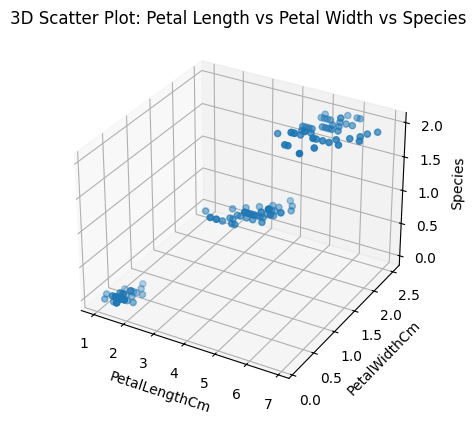

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot: Petal Length vs Petal Width vs Species')
plt.show()

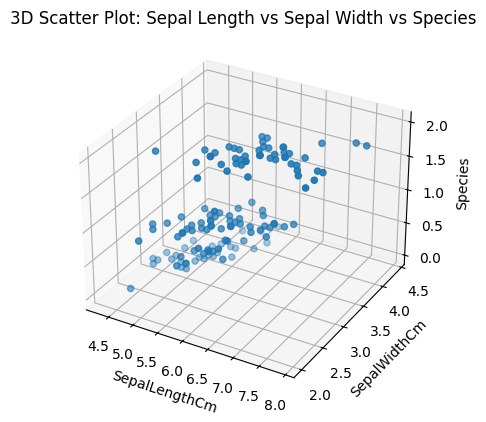

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot: Sepal Length vs Sepal Width vs Species')
plt.show()

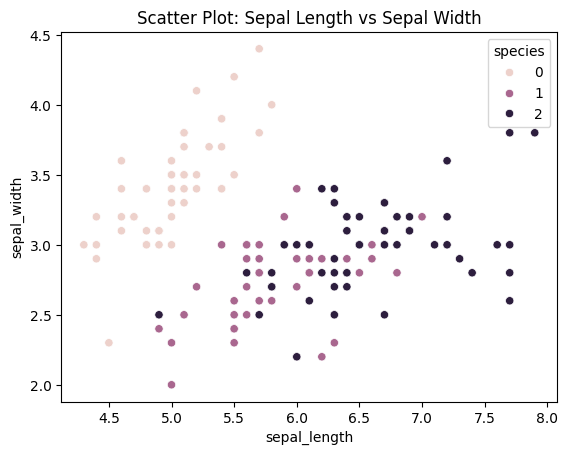

In [10]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.show()

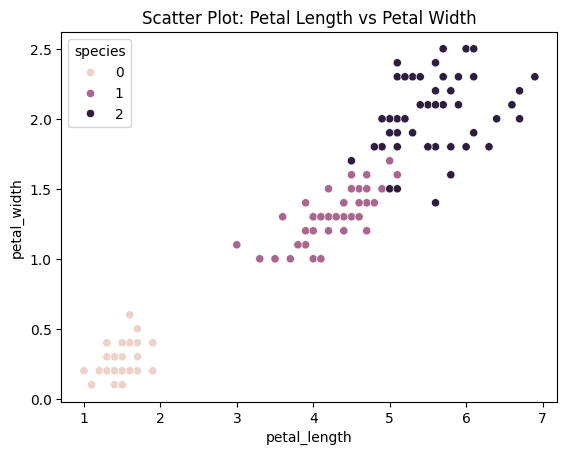

In [11]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title('Scatter Plot: Petal Length vs Petal Width')
plt.show()

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])

In [13]:
k_rng = range(1, 11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df_scaled)
    sse.append(km.inertia_)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

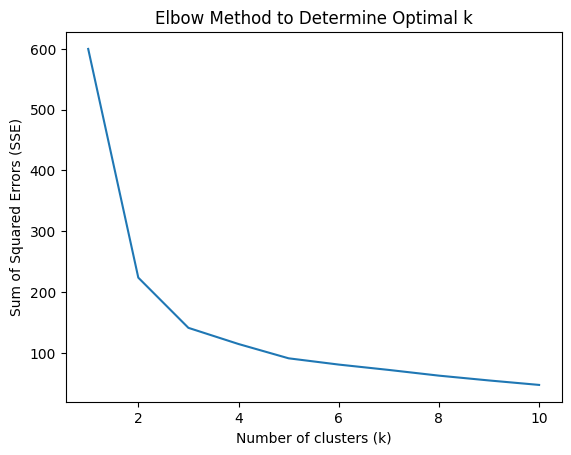

In [14]:
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(k_rng, sse)
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [15]:
km = KMeans(n_clusters=3, random_state=0)
y_predicted = km.fit_predict(df_scaled)

In [16]:
score = silhouette_score(df_scaled, y_predicted)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4556692449110409


In [17]:
df['cluster'] = y_predicted

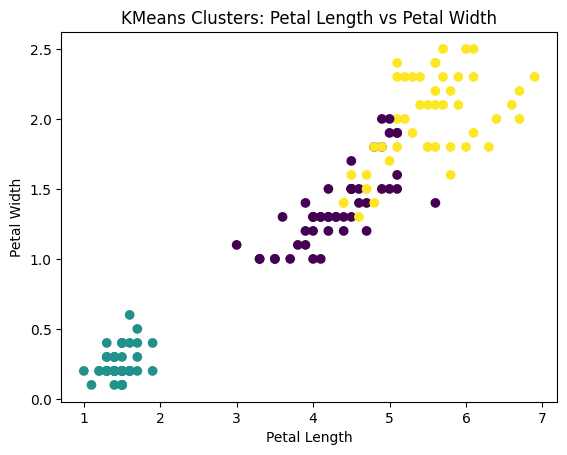

In [18]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clusters: Petal Length vs Petal Width')
plt.show()

In [19]:
cm = confusion_matrix(df.species, df.cluster)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 0 50  0]
 [38  0 12]
 [11  0 39]]


In [20]:
class_labels = ['Setosa', 'Versicolor', 'Virginica']

([<matplotlib.axis.YTick at 0x1e13adee350>,
 [Text(0, 0, 'Setosa'), Text(0, 1, 'Versicolor'), Text(0, 2, 'Virginica')])

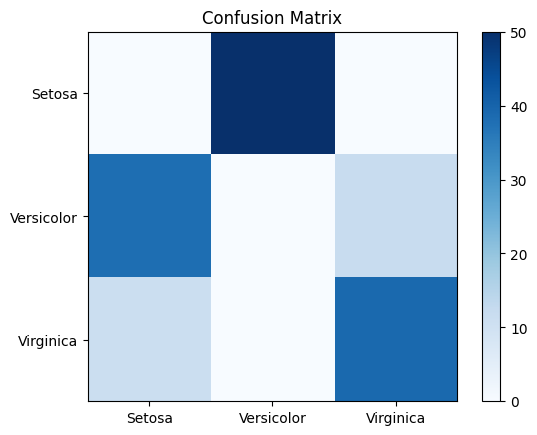

In [21]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

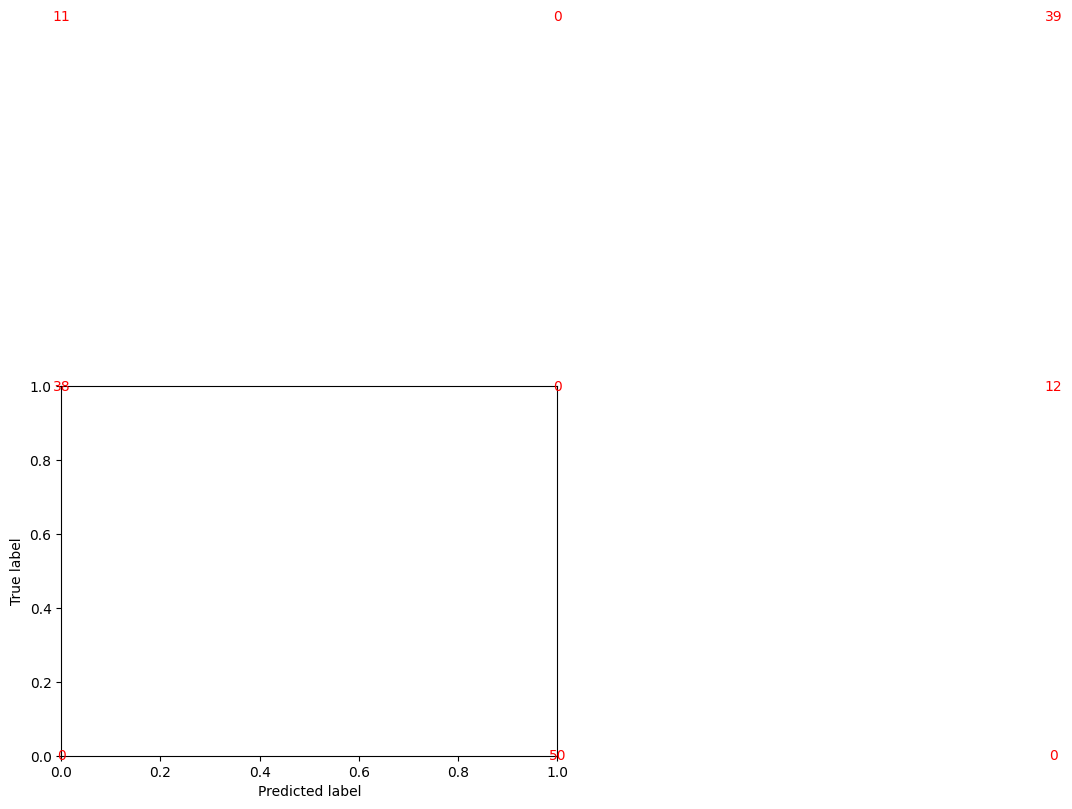

In [22]:
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='red')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']  # Original species labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 100.00%


In [28]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


([<matplotlib.axis.YTick at 0x1e13d135950>,
 [Text(0, 0, 'Setosa'), Text(0, 1, 'Versicolor'), Text(0, 2, 'Virginica')])

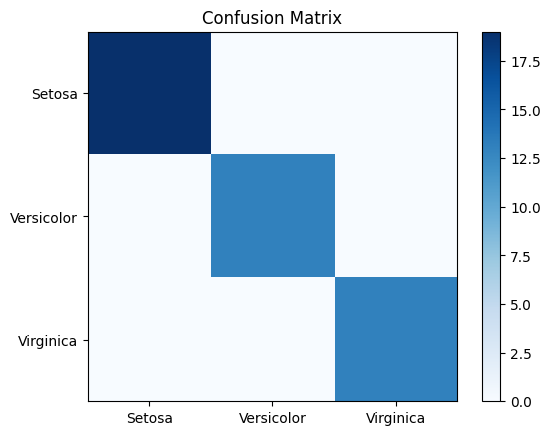

In [29]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

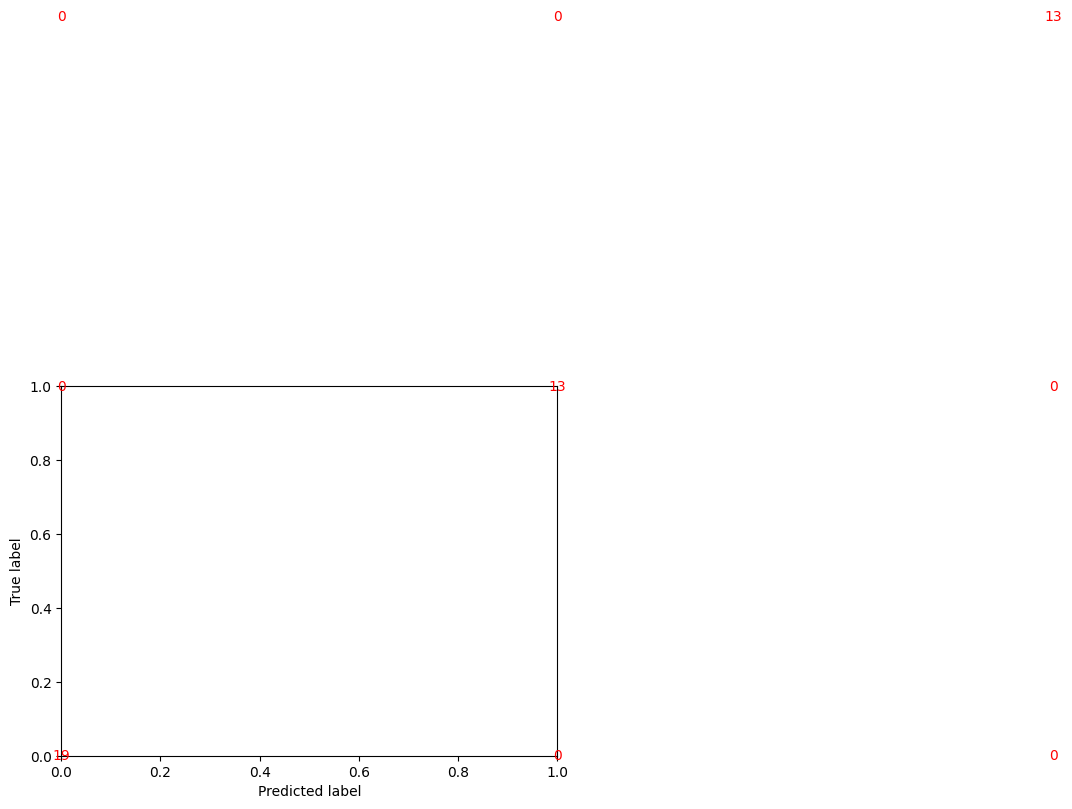

In [30]:
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='red')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()